In [30]:
!python --version
!python -m pip install --upgrade pip
!python -m pip install matplotlib pandas graphviz

Python 3.13.1


In [31]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Dérivées

In [32]:
def f(x):
    return 3*x**2 - 4*x +5

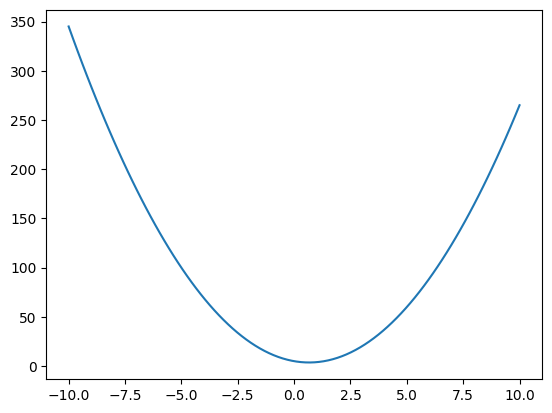

In [33]:
X = np.linspace(-10, 10, 100)
Y = f(X)
plt.plot(X, Y)

In [34]:
x = 1
h = 0.000000000000001
(f(x + h) - f(x)) / h

1.7763568394002502

Exemple plus parlant

In [35]:
x = 2 # entrée
w = -3 # poids
b = 1 # biais
y = w*x + b # sortie

print(y)

-5


In [36]:
h = 0.000000000000001

y1 = y
y2 = w*(x + h) + b
print(f"y1 = {y1}")
print(f"y2 = {y2}")

y1 = -5
y2 = -5.000000000000003


In [37]:
print(f'slope: {(y2 - y1) / h}')

slope: -2.6645352591003757


In [38]:
class Value():
    def __init__(self, data, _children = (), _op = ""):
        self.data = data
        self._prev = _children
        self._op = _op

    def __repr__(self):
        return f'Value(data = {self.data})'
    
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), "+")
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), "*")
    

a = Value(2)
b = Value(-5)
print(a, b)
print(a*b)

Value(data = 2) Value(data = -5)
Value(data = -10)


In [39]:
c = a * b
print(c._prev, c._op)

(Value(data = 2), Value(data = -5)) *


In [42]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{data %.4f}" % (n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [43]:
draw_dot(c)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH